In [1]:
import pandas as pd
import sklearn as sk
import plotly.express as pxs

df = pd.read_csv('ObesityMasterData.csv')

print(df.head())

   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       1  21.0    1.62    64.0                               1     0   2.0   
1       1  21.0    1.52    56.0                               1     0   3.0   
2       0  23.0    1.80    77.0                               1     0   2.0   
3       0  27.0    1.80    87.0                               0     0   3.0   
4       0  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  0be1dad  N  
0  3.0     1      0   2.0    0  0.0  1.0     0       1        0  4  
1  3.0     1      1   3.0    1  3.0  0.0     1       1        0  2  
2  3.0     1      0   2.0    0  2.0  1.0     2       1        0  3  
3  3.0     1      0   2.0    0  2.0  0.0     2       0        1  2  
4  1.0     1      0   2.0    0  0.0  0.0     1       1        2  5  


In [2]:
import pandas as pd
import sklearn as sk
import plotly.express as pxs

df = pd.read_csv('ObesityMasterData.csv')

df.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad,N
count,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000
mean,0.494313,24.304691,1.701631,86.580175,0.818009,0.883886,2.419242,2.685479,1.140758,0.020853,2.008015,0.045498,1.009829,0.657704,0.730806,1.191469,2.111848,2.998578
std,0.500086,6.337058,0.093302,26.195985,0.385928,0.320437,0.533975,0.778193,0.468645,0.142926,0.613099,0.208442,0.850521,0.609026,0.514879,0.463278,1.985438,1.416390
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000
25%,0.000000,19.946718,1.630000,65.448643,1.000000,1.000000,2.000000,2.658689,1.000000,0.000000,1.582010,0.000000,0.123045,0.000000,0.000000,1.000000,0.000000,2.000000
50%,0.000000,22.774751,1.700357,83.000000,1.000000,1.000000,2.386464,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,1.000000,2.000000,3.000000
75%,1.000000,26.000000,1.768385,107.456672,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.478129,0.000000,1.665973,1.000000,1.000000,1.000000,4.000000,4.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,5.000000,5.000000



Total Number of Iterations: 1000
Average accuracy: 57.297


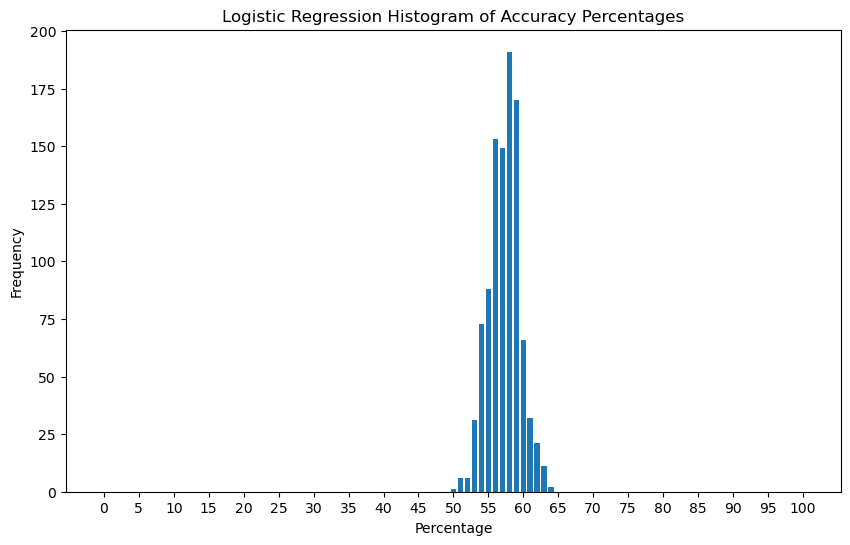

In [25]:
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning

df = pd.read_csv('ObesityMasterData.csv')

X = df.drop(columns=['N', 'Height', 'Weight', '0be1dad'])
y = df['0be1dad']
x=0
lst = [0] * 101

while x < 1000:
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)

    warnings.filterwarnings("ignore")

#     rfe_method = RFE(estimator=LogisticRegression(),n_features_to_select=14)
#     rfe_method.fit(Xtrain, ytrain)

#     Xtrain_selected = rfe_method.transform(Xtrain)
#     Xtest_selected = rfe_method.transform(Xtest)
    
    Xtrain_selected = Xtrain
    Xtest_selected = Xtest
    
#     lda_model = LinearDiscriminantAnalysis()
#     lda_model.fit(Xtrain_selected, ytrain)
#     ypred_selected = lda_model.predict(Xtest_selected)

    classifier2 = LogisticRegression(solver='lbfgs', max_iter=100)
    classifier2.fit(Xtrain_selected, ytrain)
    ypred_selected = classifier2.predict(Xtest_selected)

    cmr_selected = confusion_matrix(ytest, ypred_selected)

    accuracy_selected = accuracy_score(ytest, ypred_selected) * 100
    
    accuracy_selected = int(accuracy_selected)

    lst[accuracy_selected] = lst[accuracy_selected] + 1

#     features = np.concatenate([df.columns[0:2], df.columns[4:-2]])
#     features = np.array(features)
#     new_features = features[rfe_method.support_]
#     print(new_features)

#     print(cmr_selected)

    x = x + 1
#     print(x)

sumTot = 0
sumMean = 0
print()
for i in range(0,101):
#     print(str(i) + '% occurred this many times: ' + str(lst[i]))
    sumTot = sumTot + lst[i]
    
for i in range(0,101):
    sumMean = sumMean + (lst[i] * i)

sumMean = sumMean/sumTot

print('Total Number of Iterations: ' + str(sumTot))
print('Average accuracy: ' + str(sumMean))


percentages = list(range(101))

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(percentages, lst)

# Set labels and title
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Logistic Regression Histogram of Accuracy Percentages')

# Set x-axis ticks to show every 5 percentage points for better readability
plt.xticks(range(0, 101, 5))

# Show the plot
plt.show()
    
    



In [1]:
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning

df = pd.read_csv('ObesityMasterData.csv')

X = df.drop(columns=['N', 'Age', 'Height', 'Weight', 'family_history_with_overweight', '0be1dad'])
y = df['0be1dad']
x=0
lst = [0] * 101

while x < 1:
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, bootstrap = True)

    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)

    Xtrain_selected = Xtrain
    Xtest_selected = Xtest


    classifier2 = RandomForestClassifier()
    classifier2.fit(Xtrain_selected, ytrain)

    ypred_selected = classifier2.predict(Xtest_selected)
    
    
    accuracy_selected = accuracy_score(ytest, ypred_selected) * 100
    accuracy_selected = int(accuracy_selected)
    lst[accuracy_selected] = lst[accuracy_selected] + 1
#     print(accuracy_selected)
    

#     cmr_selected = confusion_matrix(ytest, ypred_selected)
#     print(cmr_selected)

    x = x+1
#     print(x)

sumTot = 0
sumMean = 0
print()
for i in range(0,101):
#     print(str(i) + '% occurred this many times: ' + str(lst[i]))
    sumTot = sumTot + lst[i]
    
for i in range(0,101):
    sumMean = sumMean + (lst[i] * i)

sumMean = sumMean/sumTot

print('Total Number of Iterations: ' + str(sumTot))
print('Average accuracy: ' + str(sumMean))


percentages = list(range(101))

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(percentages, lst)

# Set labels and title
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Random Forest Histogram of Accuracy Percentages')

# Set x-axis ticks to show every 5 percentage points for better readability
plt.xticks(range(0, 101, 5))

# Show the plot
plt.show()

TypeError: train_test_split() got an unexpected keyword argument 'bootstrap'

Confusion Matrix for Logistic Regression 7 Categories: 
[[17 11  1  0  7 10  4]
 [ 9 14  7 12  7  9  6]
 [ 4  4 24  5  5 12  3]
 [ 2  4  5 10 17 10  2]
 [ 9  5  6  4 44 12  2]
 [ 0  0 12  1  2 48  0]
 [ 0  0  0  0  0  0 56]]
Accuracy: 50%

Total Number of Iterations: 1
Average accuracy: 50.0


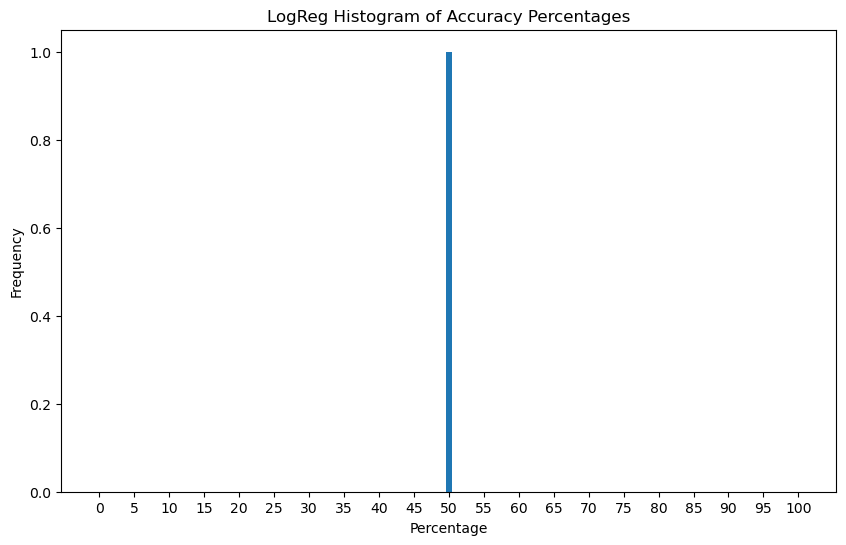

In [2]:
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning

df = pd.read_csv('ObesityMasterData.csv')

X = df.drop(columns=['N', 'Height', 'Weight', 'Age','family_history_with_overweight', '0be1dad'])
y = df['0be1dad']
x=0
lst = [0] * 101

while x < 1:
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)

    warnings.filterwarnings("ignore")
    
    Xtrain_selected = Xtrain
    Xtest_selected = Xtest

    classifier2 = LogisticRegression(solver='lbfgs', max_iter=100)
    classifier2.fit(Xtrain_selected, ytrain)
    ypred_selected = classifier2.predict(Xtest_selected)

    cmr_selected = confusion_matrix(ytest, ypred_selected)
    print("Confusion Matrix for Logistic Regression 7 Categories: ")
    print(cmr_selected)

    accuracy_selected = accuracy_score(ytest, ypred_selected) * 100
    
    accuracy_selected = int(accuracy_selected)
    print("Accuracy: " + str(accuracy_selected) + "%")

    lst[accuracy_selected] = lst[accuracy_selected] + 1


    x = x + 1
#     print(x)

sumTot = 0
sumMean = 0
print()
for i in range(0,101):
#     print(str(i) + '% occurred this many times: ' + str(lst[i]))
    sumTot = sumTot + lst[i]
    
for i in range(0,101):
    sumMean = sumMean + (lst[i] * i)

sumMean = sumMean/sumTot

print('Total Number of Iterations: ' + str(sumTot))
print('Average accuracy: ' + str(sumMean))


percentages = list(range(101))

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(percentages, lst)

# Set labels and title
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('LogReg Histogram of Accuracy Percentages')

# Set x-axis ticks to show every 5 percentage points for better readability
plt.xticks(range(0, 101, 5))

# Show the plot
plt.show()
    
    




Total Number of Iterations: 1000
Average accuracy: 84.144


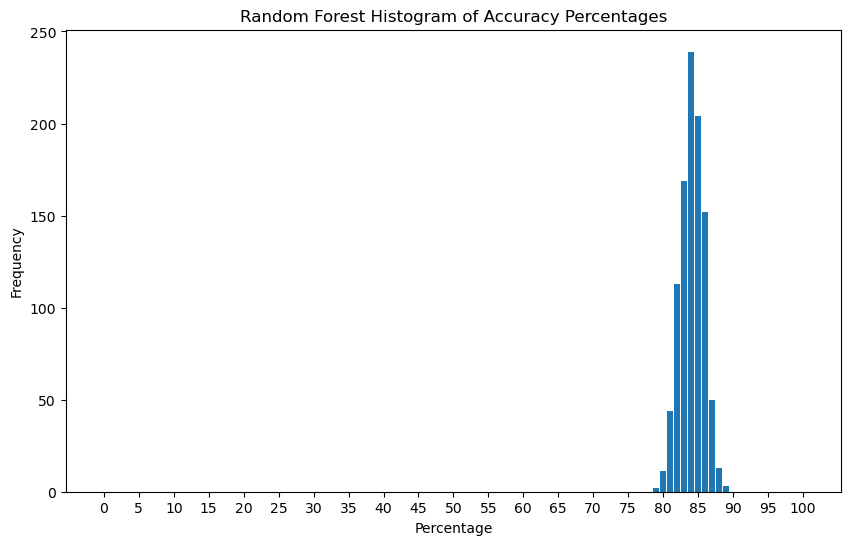

In [22]:
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning

df = pd.read_csv('ObesityMasterData.csv')

# X = df.drop(columns=['N', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAF', '0be1dad'])
# X = df[['family_history_with_overweight']]
X = df[(df['family_history_with_overweight'] == 0)]
X = df.drop(columns = ['N','0be1dad', 'Height', 'Weight', 'family_history_with_overweight'])

# print(X)
# X = df[['FCVC']]

# X = df[['CH2O']]
# X = df[['FAF']]
# X = df[['FAF', 'FCVC', 'CH2O', 'TUE']]
# X = df[['FAF', 'FCVC', 'CH2O', 'TUE',  'MTRANS', 'FAVC', 'CAEC', 'CALC', 'NCP', 'SCC', 'Gender']]
# X = df[['FAF', 'FCVC', 'CH2O', 'TUE', 'Age', 'family_history_with_overweight', 'MTRANS', 'Gender']]
# X = df[['FAVC', 'CAEC', 'CALC', 'NCP', 'SCC', 'Gender']]
y = df['0be1dad']
x=0
lst = [0] * 101

while x < 1000:
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)

    Xtrain_selected = Xtrain
    Xtest_selected = Xtest

    classifier2 = RandomForestClassifier()
    classifier2.fit(Xtrain_selected, ytrain)

    ypred_selected = classifier2.predict(Xtest_selected)
    
    
    accuracy_selected = accuracy_score(ytest, ypred_selected) * 100
    accuracy_selected = int(accuracy_selected)
    lst[accuracy_selected] = lst[accuracy_selected] + 1
    
    x = x+1
#     print(x)

sumTot = 0
sumMean = 0
print()
for i in range(0,101):
#     print(str(i) + '% occurred this many times: ' + str(lst[i]))
    sumTot = sumTot + lst[i]
    
for i in range(0,101):
    sumMean = sumMean + (lst[i] * i)

sumMean = sumMean/sumTot

print('Total Number of Iterations: ' + str(sumTot))
print('Average accuracy: ' + str(sumMean))


percentages = list(range(101))

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(percentages, lst)

# Set labels and title
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Random Forest Histogram of Accuracy Percentages')

# Set x-axis ticks to show every 5 percentage points for better readability
plt.xticks(range(0, 101, 5))

# Show the plot
plt.show()


Average RMSE of Linear Regression: 7.095808974980668


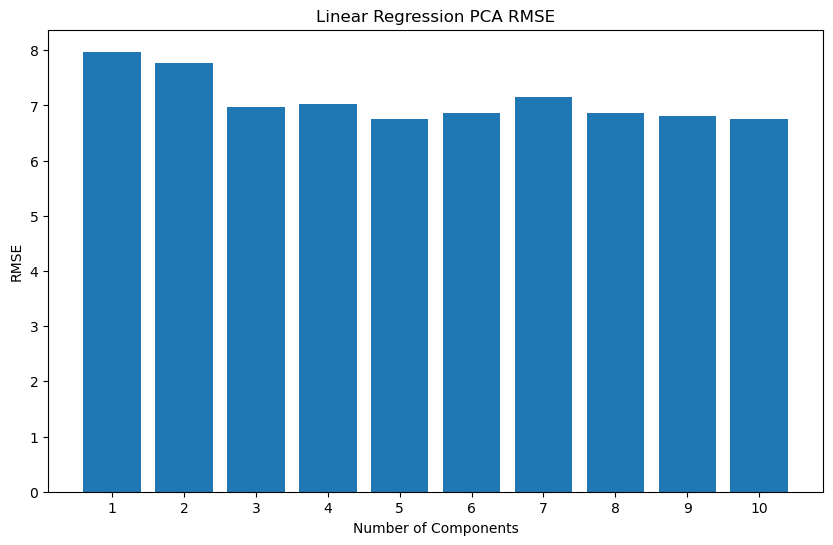

In [28]:
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error

df = pd.read_csv('BMI_MasterData.csv')

X = df.drop(columns=['Height', 'Weight', 'familyHistoryOverWeight', 'Age', 'Classification', 'BMI'])
y = df['BMI']
x=0
number = 10
lst = [0] * number
lst2 = [0] * number
features = ['Gender','FreqHighCalorie','FreqVegConsump','NumberMainMeals','EatingBetweenMeals','Smoker','WaterIntake','CountCalories','PhysicalActivityFreq','TimeUsineTech','AlcholIntake','CommuteType','BMI']

while x < number:
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)
    
#     pca = PCA(.80)
    pca = PCA(n_components=x+1)
    pca.fit(Xtrain, ytrain)

    Xtrain = pca.transform(Xtrain)
    Xtest = pca.transform(Xtest)

    warnings.filterwarnings("ignore")
    
    Xtrain_selected = Xtrain
    Xtest_selected = Xtest

    classifier2 = LinearRegression()
    classifier2.fit(Xtrain_selected, ytrain)
    ypred_selected = classifier2.predict(Xtest_selected)
    
#     ypred_unselected = y_scaler.inverse_transform(ypred_selected)

    rmse = np.sqrt(mean_squared_error(ytest, ypred_selected))
    lst[x] = rmse
    lst2[x] = x + 1

    x = x + 1
#     print(x)

sumTot = 0
sumMean = 0
print()
for i in range(0,number):
    sumTot = sumTot + lst[i]

sumMean = sumTot / number

print('Average RMSE of Linear Regression: ' + str(sumMean))

plt.figure(figsize=(10, 6))
plt.bar(lst2, lst)

# Set labels and title
plt.xlabel('Number of Components')
plt.ylabel('RMSE')
plt.title('Linear Regression PCA RMSE')

# Set x-axis ticks to show every 5 percentage points for better readability
plt.xticks(range(1, x+1, 1))

# Show the plot
plt.show()
    
    



C:\Users\arcve\AppData\Local\Temp\ipykernel_268\3900607621.py:64: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\arcve\AppData\Local\Temp\ipykernel_268\3900607621.py:87: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


The amount of variance explained by the first component is: 13.02%, by the second component is: 11.49%, and the third component is: 10.71%, for a total of: 35.22% of explained variance


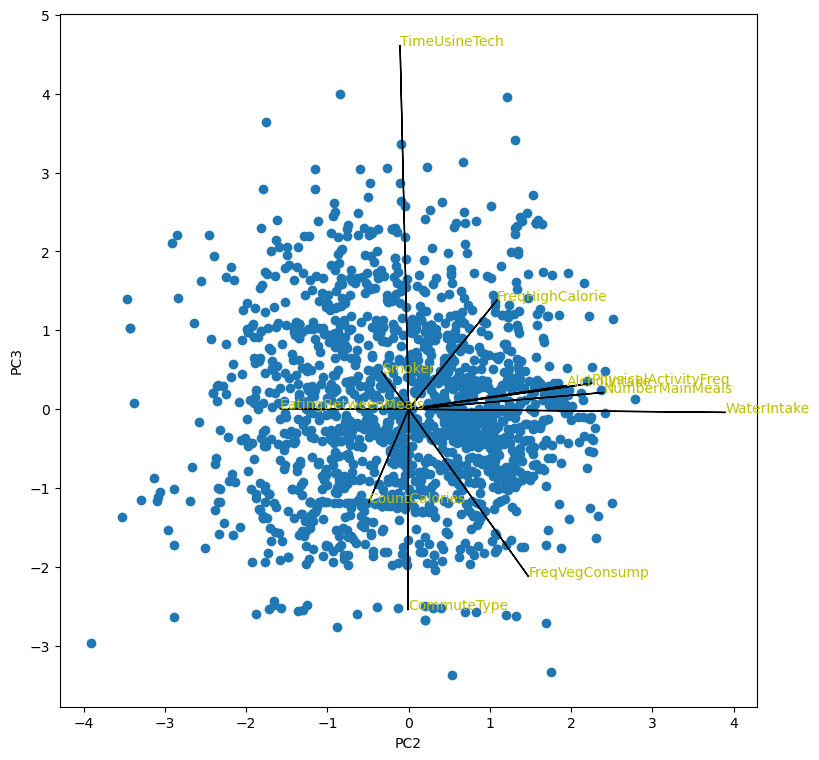

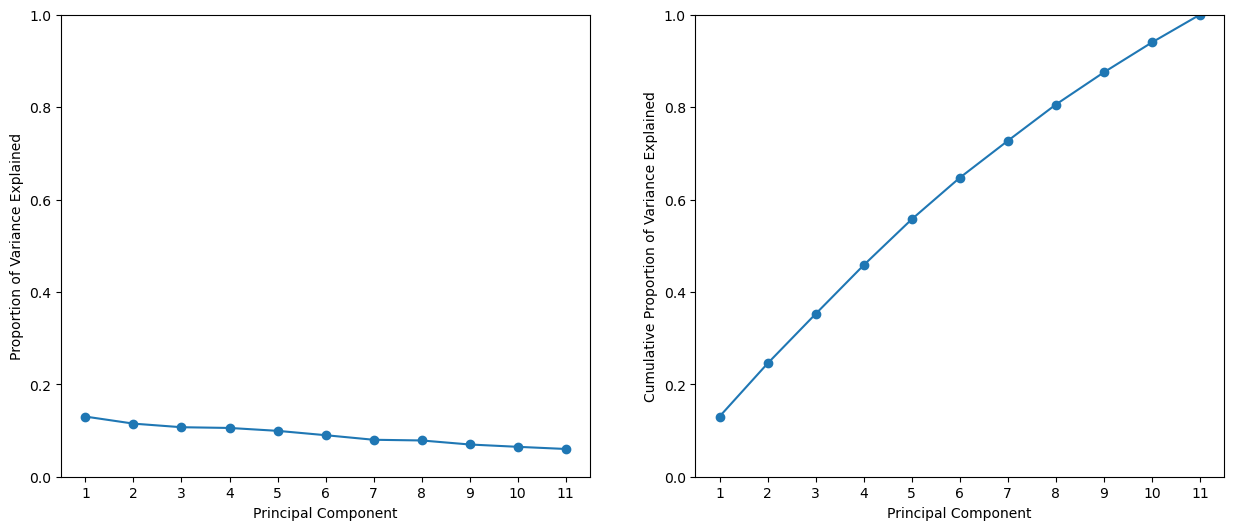

In [1]:
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error

df = pd.read_csv('BMI_MasterData.csv')

X = df.drop(columns=['Gender','Height', 'Weight', 'familyHistoryOverWeight', 'Age', 'Classification', 'BMI'])
y = df['BMI']

features = ['Gender','FreqHighCalorie','FreqVegConsump','NumberMainMeals','EatingBetweenMeals','Smoker','WaterIntake','CountCalories','PhysicalActivityFreq','TimeUsineTech','AlcoholIntake','CommuteType','BMI']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

# pca = PCA(.85)
# pca = PCA(n_components = 9)
pca = PCA()
pca.fit(Xtrain, ytrain)

Xtrain = pca.transform(Xtrain)
Xtest = pca.transform(Xtest)

Xtrain_selected = Xtrain
Xtest_selected = Xtest

# classifier2 = LinearRegression()
# classifier2.fit(Xtrain_selected, ytrain)
# ypred_selected = classifier2.predict(Xtest_selected)

scale_arrow = s_ = 6
Xtrain[:,1] *= -1
pca.components_[1] *= -1
i, j = 1, 2 # which components
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
ax.scatter(Xtrain[:, i], Xtrain[:, j])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pca.components_.shape[1]):
    ax.arrow(0, 0, s_*pca.components_[i, k], s_*pca.components_[j, k])
    ax.text(s_*pca.components_[i, k], s_*pca.components_[j, k], X.columns[k], color='y')
fig.show()


# %%capture
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pca.n_components_)+1
ax = axes[0]
ax.plot(ticks,
        pca.explained_variance_ratio_,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

ax = axes[1]
ax.plot(ticks,
        pca.explained_variance_ratio_.cumsum(),
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig.show()

# print()
# print(pca.explained_variance_ratio_)

component1 = round((pca.explained_variance_ratio_[0]*100), 2)
component2 = round((pca.explained_variance_ratio_[1]*100), 2)
component3 = round((pca.explained_variance_ratio_[2]*100), 2)

combined = (component1 + component2 + component3)
combined = round(combined, 2)
print('The amount of variance explained by the first component is: ' + str(component1) + '%, by the second component is: ' + str(component2) + '%, and the third component is: ' + str(component3) + '%, for a total of: ' + str(combined) + '% of explained variance')
    
    



In [21]:
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, chi2
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.formula.api import ols
import statsmodels.api as sm

df = pd.read_csv('BMI_MasterData.csv')

df['NumberMainMeals'] = df['NumberMainMeals'].round(decimals=0)
df['FreqVegConsump'] = df['FreqVegConsump'].round(decimals=0)
df['WaterIntake'] = df['WaterIntake'].round(decimals=1)
df['PhysicalActivityFreq'] = df['PhysicalActivityFreq'].round(decimals=0)
df['TimeUsineTech'] = df['TimeUsineTech'].round(decimals=1)
df['BMI'] = df['TimeUsineTech'].round(decimals=1)
# df['NumberMainMeals'] = df['NumberMainMeals'].round(decimals=0)

X = df.drop(columns=['Gender','Height', 'Weight', 'familyHistoryOverWeight', 'Age', 'Classification', 'BMI'])
y = df['BMI']

features = ['Gender','FreqHighCalorie','FreqVegConsump','NumberMainMeals','EatingBetweenMeals','Smoker','WaterIntake','CountCalories','PhysicalActivityFreq','TimeUsineTech','AlcoholIntake','CommuteType','BMI']

model = ols('BMI ~ C(NumberMainMeals) + C(FreqHighCalorie) + C(FreqVegConsump)\
        +C(EatingBetweenMeals)+C(Smoker)+C(CountCalories)\
        +C(PhysicalActivityFreq)+C(CommuteType)+C(AlcholIntake)', data=df).fit()
anova_table1 = sm.stats.anova_lm(model, typ=2)

print("ANOVA Table:")
print(anova_table1)
print()


ANOVA Table:
                             sum_sq      df          F        PR(>F)
C(NumberMainMeals)         0.712457     3.0   0.698623  5.528604e-01
C(FreqHighCalorie)         7.117923     1.0  20.939142  5.019148e-06
C(FreqVegConsump)          8.644979     2.0  12.715677  3.243244e-06
C(EatingBetweenMeals)     11.012129     3.0  10.798305  4.856357e-07
C(Smoker)                  0.450203     1.0   1.324384  2.499384e-01
C(CountCalories)           0.021985     1.0   0.064674  7.992804e-01
C(PhysicalActivityFreq)    3.981781     3.0   3.904467  8.549905e-03
C(CommuteType)            35.705765     2.0  52.518695  5.572627e-23
C(AlcholIntake)           12.165893     3.0  11.929667  9.577289e-08
Residual                 710.461759  2090.0        NaN           NaN



Confusion Matrix of Binary Obesity Classification:
[[162  72]
 [ 50 138]]
Accuracy: 71%
Confusion Matrix of Binary Obesity Classification:
[[140  83]
 [ 54 145]]
Accuracy: 67%
Confusion Matrix of Binary Obesity Classification:
[[152  63]
 [ 61 146]]
Accuracy: 70%
Confusion Matrix of Binary Obesity Classification:
[[146  64]
 [ 59 153]]
Accuracy: 70%
Confusion Matrix of Binary Obesity Classification:
[[147 101]
 [ 43 131]]
Accuracy: 65%
Confusion Matrix of Binary Obesity Classification:
[[154  76]
 [ 38 154]]
Accuracy: 72%
Confusion Matrix of Binary Obesity Classification:
[[155  70]
 [ 54 143]]
Accuracy: 70%
Confusion Matrix of Binary Obesity Classification:
[[163  80]
 [ 50 129]]
Accuracy: 69%
Confusion Matrix of Binary Obesity Classification:
[[148  65]
 [ 57 152]]
Accuracy: 71%
Confusion Matrix of Binary Obesity Classification:
[[142  83]
 [ 46 151]]
Accuracy: 69%

Total Number of Iterations: 10
Average accuracy: 69.4


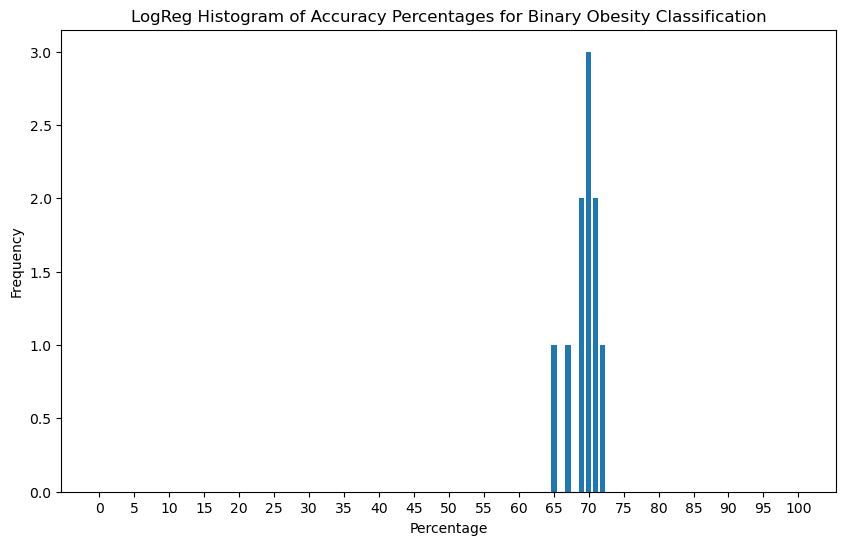

In [1]:
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning

df = pd.read_csv('BMI_ClassRedone.csv')

X = df.drop(columns=['Gender','Height', 'Weight', 'familyHistoryOverWeight', 'Age', 'Classification', 'BMI'])
y = df['Classification']
x=0
lst = [0] * 101

while x < 10:
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)

    warnings.filterwarnings("ignore")
    
    Xtrain_selected = Xtrain
    Xtest_selected = Xtest

    classifier2 = LogisticRegression(solver='lbfgs', max_iter=100)
    classifier2.fit(Xtrain_selected, ytrain)
    ypred_selected = classifier2.predict(Xtest_selected)

    cmr_selected = confusion_matrix(ytest, ypred_selected)
    print("Confusion Matrix of Binary Obesity Classification:")
    print(cmr_selected)

    accuracy_selected = accuracy_score(ytest, ypred_selected) * 100
    
    accuracy_selected = int(accuracy_selected)

    lst[accuracy_selected] = lst[accuracy_selected] + 1
    print("Accuracy: " + str(accuracy_selected) + "%")


    x = x + 1
#     print(x)

sumTot = 0
sumMean = 0
print()
for i in range(0,101):
#     print(str(i) + '% occurred this many times: ' + str(lst[i]))
    sumTot = sumTot + lst[i]
    
for i in range(0,101):
    sumMean = sumMean + (lst[i] * i)

sumMean = sumMean/sumTot

print('Total Number of Iterations: ' + str(sumTot))
print('Average accuracy: ' + str(sumMean))


percentages = list(range(101))

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(percentages, lst)

# Set labels and title
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('LogReg Histogram of Accuracy Percentages for Binary Obesity Classification')

# Set x-axis ticks to show every 5 percentage points for better readability
plt.xticks(range(0, 101, 5))

# Show the plot
plt.show()
    
    



Confusion Matrix of Binary Obesity Random Forest
[[200  12]
 [ 32 178]]
Accuracy: 89%
Top Features:
                 Feature  Importance
5            WaterIntake    0.159508
7   PhysicalActivityFreq    0.150364
2        NumberMainMeals    0.149037
8          TimeUsineTech    0.143802
1         FreqVegConsump    0.141374
3     EatingBetweenMeals    0.090268
9           AlcholIntake    0.051236
0        FreqHighCalorie    0.049427
10           CommuteType    0.043128
6          CountCalories    0.015557

Total Number of Iterations: 1
Average accuracy: 89.0


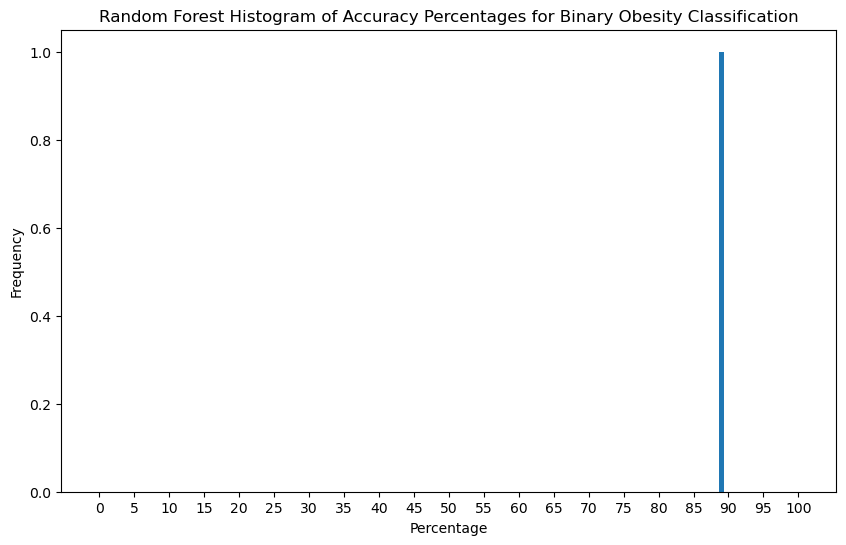

In [8]:
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning

df = pd.read_csv('BMI_ClassRedone.csv')

X = df.drop(columns=['Gender','Height', 'Weight', 'familyHistoryOverWeight', 'Age', 'Classification', 'BMI'])
y = df['Classification']
x=0
lst = [0] * 101

while x < 1:
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)

    warnings.filterwarnings("ignore")
    
    Xtrain_selected = Xtrain
    Xtest_selected = Xtest

    classifier2 = RandomForestClassifier()
    classifier2.fit(Xtrain_selected, ytrain)
    ypred_selected = classifier2.predict(Xtest_selected)

    cmr_selected = confusion_matrix(ytest, ypred_selected)
    print("Confusion Matrix of Binary Obesity Random Forest")
    print(cmr_selected)

    accuracy_selected = accuracy_score(ytest, ypred_selected) * 100
    
    accuracy_selected = int(accuracy_selected)
    print("Accuracy: " + str(accuracy_selected) + "%")

    lst[accuracy_selected] = lst[accuracy_selected] + 1
    
    feature_importances = classifier2.feature_importances_

    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print("Top Features:")
    print(feature_importance_df.head(10))


    x = x + 1
#     print(x)

sumTot = 0
sumMean = 0
print()
for i in range(0,101):
#     print(str(i) + '% occurred this many times: ' + str(lst[i]))
    sumTot = sumTot + lst[i]
    
for i in range(0,101):
    sumMean = sumMean + (lst[i] * i)

sumMean = sumMean/sumTot

print('Total Number of Iterations: ' + str(sumTot))
print('Average accuracy: ' + str(sumMean))


percentages = list(range(101))

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(percentages, lst)

# Set labels and title
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Random Forest Histogram of Accuracy Percentages for Binary Obesity Classification')

# Set x-axis ticks to show every 5 percentage points for better readability
plt.xticks(range(0, 101, 5))

# Show the plot
plt.show()
    
    



Classification in order is: underweight, normal, over1, over2, obes1, obes2, obes3

K = 1
[[48  7  3  3  1  1  1]
 [ 6 22  7  8  4  8  1]
 [ 2  6 30  2  7  6  0]
 [ 2  3  3 30  5  3  2]
 [ 2  4  5  9 47  3  1]
 [ 2  4  6  0  2 48  0]
 [ 1  0  2  2  1  0 62]]

K = 100
[[24  3  1 11  6  9 10]
 [10  8  6 10  5 10  7]
 [ 3  3  7  3  8 18 11]
 [ 2  1  1 21 12  8  3]
 [ 1  2  0  8 44 12  4]
 [ 1  0  0  3  5 44  9]
 [ 0  0  0  0  0  0 68]]

K = 3
[[48  7  4  2  1  1  1]
 [11 23  7  9  2  3  1]
 [ 5  7 25  1  7  8  0]
 [ 2  5  1 32  3  4  1]
 [ 5 10  5  7 39  5  0]
 [ 2  7  5  1  2 43  2]
 [ 1  0  0  1  0  0 66]]



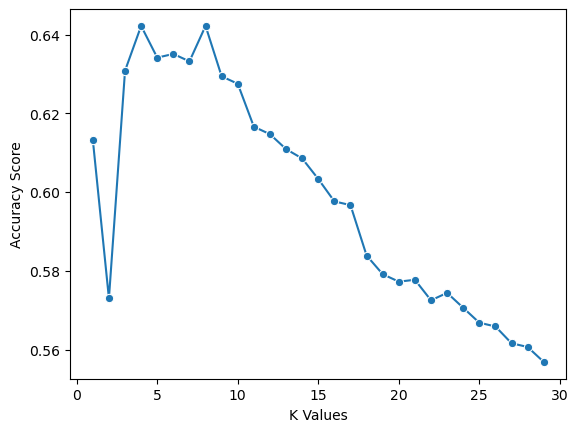

In [2]:
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

df = pd.read_csv('BMI_MasterData.csv')
# df = pd.read_csv('BMI_ClassRedone.csv')


df['NumberMainMeals'] = df['NumberMainMeals'].round(decimals=0)
df['FreqVegConsump'] = df['FreqVegConsump'].round(decimals=0)
df['WaterIntake'] = df['WaterIntake'].round(decimals=1)
df['PhysicalActivityFreq'] = df['PhysicalActivityFreq'].round(decimals=0)
df['TimeUsineTech'] = df['TimeUsineTech'].round(decimals=1)
df['BMI'] = df['TimeUsineTech'].round(decimals=1)

X = df.drop(columns=['Gender','Height', 'Weight', 'familyHistoryOverWeight', 'Age', 'Classification', 'BMI'])
y = df['Classification']

features = ['Gender','FreqHighCalorie','FreqVegConsump','NumberMainMeals','EatingBetweenMeals','Smoker','WaterIntake','CountCalories','PhysicalActivityFreq','TimeUsineTech','AlcoholIntake','CommuteType','BMI']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(Xtrain, ytrain)

Xtrain_selected = Xtrain
Xtest_selected = Xtest

ypred_selected = neigh.predict(Xtest_selected)
print('Classification in order is: underweight, normal, over1, over2, obes1, obes2, obes3')
print()

cmr_selected = confusion_matrix(ytest, ypred_selected)
print('K = 1')
print(cmr_selected)
print()


neigh = KNeighborsClassifier(n_neighbors=100)
neigh.fit(Xtrain, ytrain)

Xtrain_selected = Xtrain
Xtest_selected = Xtest

ypred_selected = neigh.predict(Xtest_selected)

cmr_selected = confusion_matrix(ytest, ypred_selected)
print('K = 100')
print(cmr_selected)
print()

k_values = [i for i in range (1,30)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(Xtrain, ytrain)

Xtrain_selected = Xtrain
Xtest_selected = Xtest

ypred_selected = neigh.predict(Xtest_selected)

cmr_selected = confusion_matrix(ytest, ypred_selected)
print('K = 3')
print(cmr_selected)
print()





In [5]:
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

df = pd.read_csv('BMI_MasterData.csv')

X = df.drop(columns=['Gender','Height', 'Weight', 'familyHistoryOverWeight', 'Age', 'Classification', 'BMI'])
y = df['Classification']

features = ['Gender','FreqHighCalorie','FreqVegConsump','NumberMainMeals','EatingBetweenMeals','Smoker','WaterIntake','CountCalories','PhysicalActivityFreq','TimeUsineTech','AlcoholIntake','CommuteType','BMI']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

kmeans = KMeans(n_clusters = 7, n_init = 20).fit(Xtrain)

Xtrain = kmeans.transform(Xtrain)
Xtest = kmeans.transform(Xtest)

ypred_selected = kmeans.predict(Xtest_selected)

cmr_selected = confusion_matrix(ytest, ypred_selected)
print(cmr_selected)

# HClust = AgglomerativeClustering
# hc_comp = HClust(distance_threshold=0, n_clusters = None, linkage = 'complete')
# hc_comp.fit(Xtrain)

# # hc_avg = HClust(distance_threshold=0, n_clusters=None,linkage='average')
# # hc_avg.fit(X)

# fig,ax = plt.subplots
# dendrogram(hc_comp)
# plt.show()


hc_comp_scale = HClust(distance_threshold=0,
                       n_clusters=None,
                       linkage='complete').fit(Xtrain)
linkage_comp_scale = linkage(hc_comp_scale)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp_scale, ax=ax, **cargs)
ax.set_title("Hierarchical Clustering with Scaled Features");



C:\Users\arcve\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


[[ 0  6 13  9  3  8  3  6]
 [ 0  2 19 12  0 15  1  9]
 [ 0  5 12 15  4 14  2  4]
 [ 0  5 14 12  3 12  2 12]
 [ 0  6 19  8  3 14  1  7]
 [ 0 10 14 11  1 11  3 11]
 [ 0 13 25 15  3 13  4  8]
 [ 0  0  0  0  0  0  0  0]]


NameError: name 'HClust' is not defined

In [4]:
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
import sklearn.model_selection as skm

# df = pd.read_csv('BMI_MasterData.csv')
df = pd.read_csv('BMI_ClassRedone.csv')


X = df.drop(columns=['Gender','Height', 'Weight', 'familyHistoryOverWeight', 'Age', 'Classification', 'BMI'])
y = df['Classification']

features = ['Gender','FreqHighCalorie','FreqVegConsump','NumberMainMeals','EatingBetweenMeals','Smoker','WaterIntake','CountCalories','PhysicalActivityFreq','TimeUsineTech','AlcoholIntake','CommuteType','BMI']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

kmeans = KMeans(n_clusters = 2, n_init = 20).fit(Xtrain)

Xtrain = kmeans.transform(Xtrain)
Xtest = kmeans.transform(Xtest)

ypred_selected = kmeans.predict(Xtest_selected)

cmr_selected = confusion_matrix(ytest, ypred_selected)
print(cmr_selected)

# HClust = AgglomerativeClustering
# hc_comp = HClust(distance_threshold=0, n_clusters = None, linkage = 'complete')
# hc_comp.fit(Xtrain)

# # hc_avg = HClust(distance_threshold=0, n_clusters=None,linkage='average')
# # hc_avg.fit(X)

# fig,ax = plt.subplots
# dendrogram(hc_comp)
# plt.show()



C:\Users\arcve\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


NameError: name 'Xtest_selected' is not defined

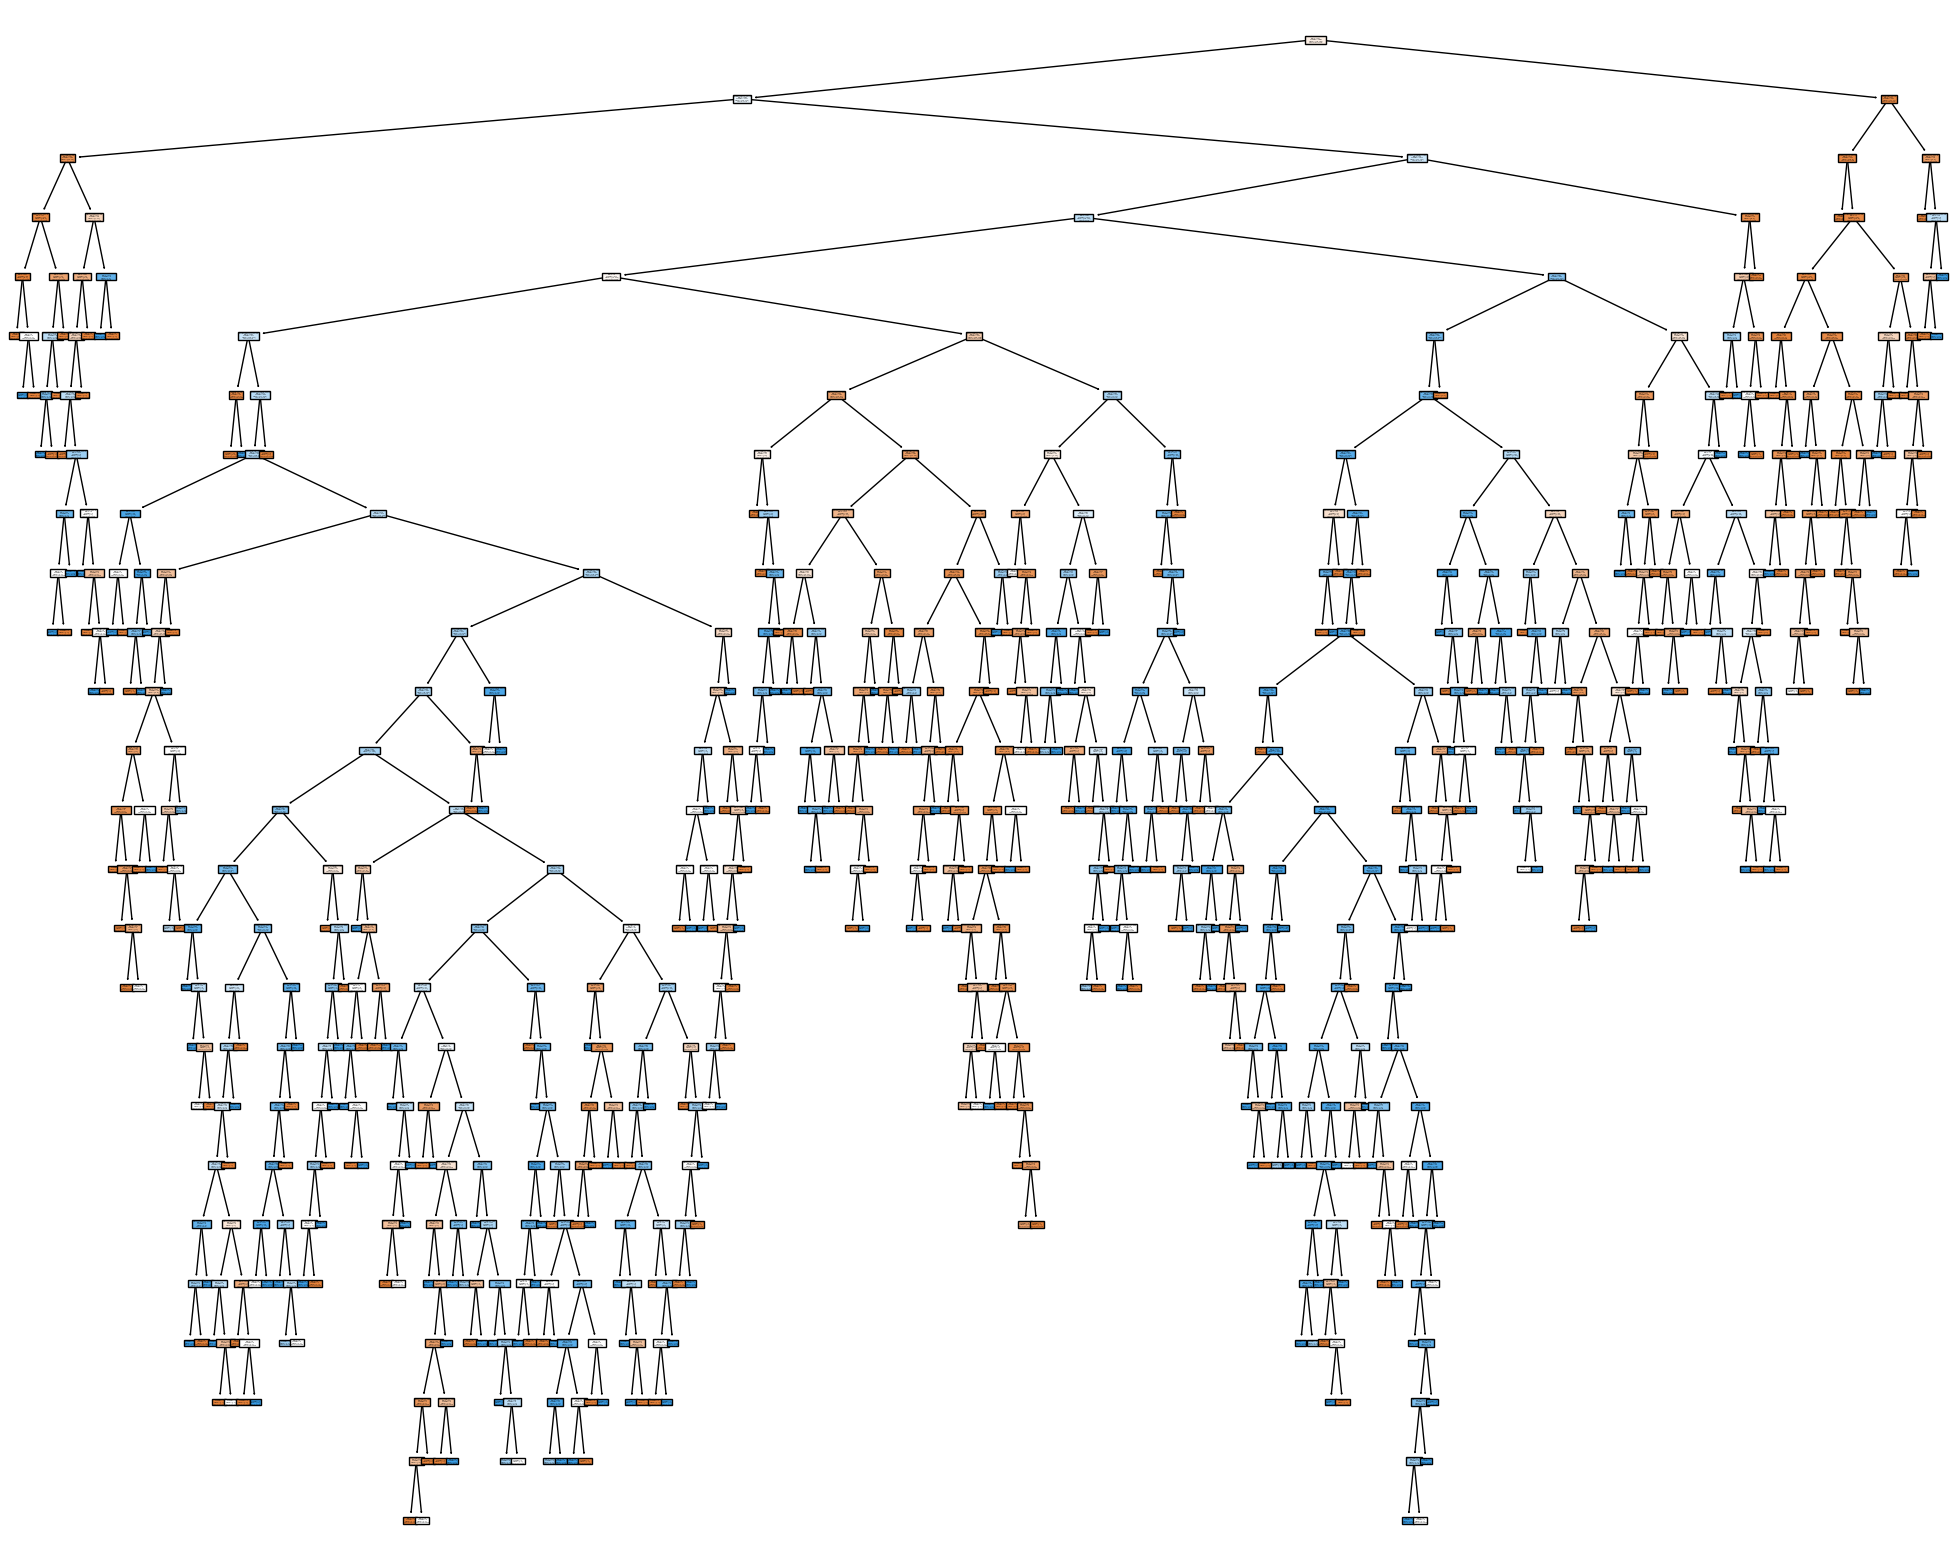

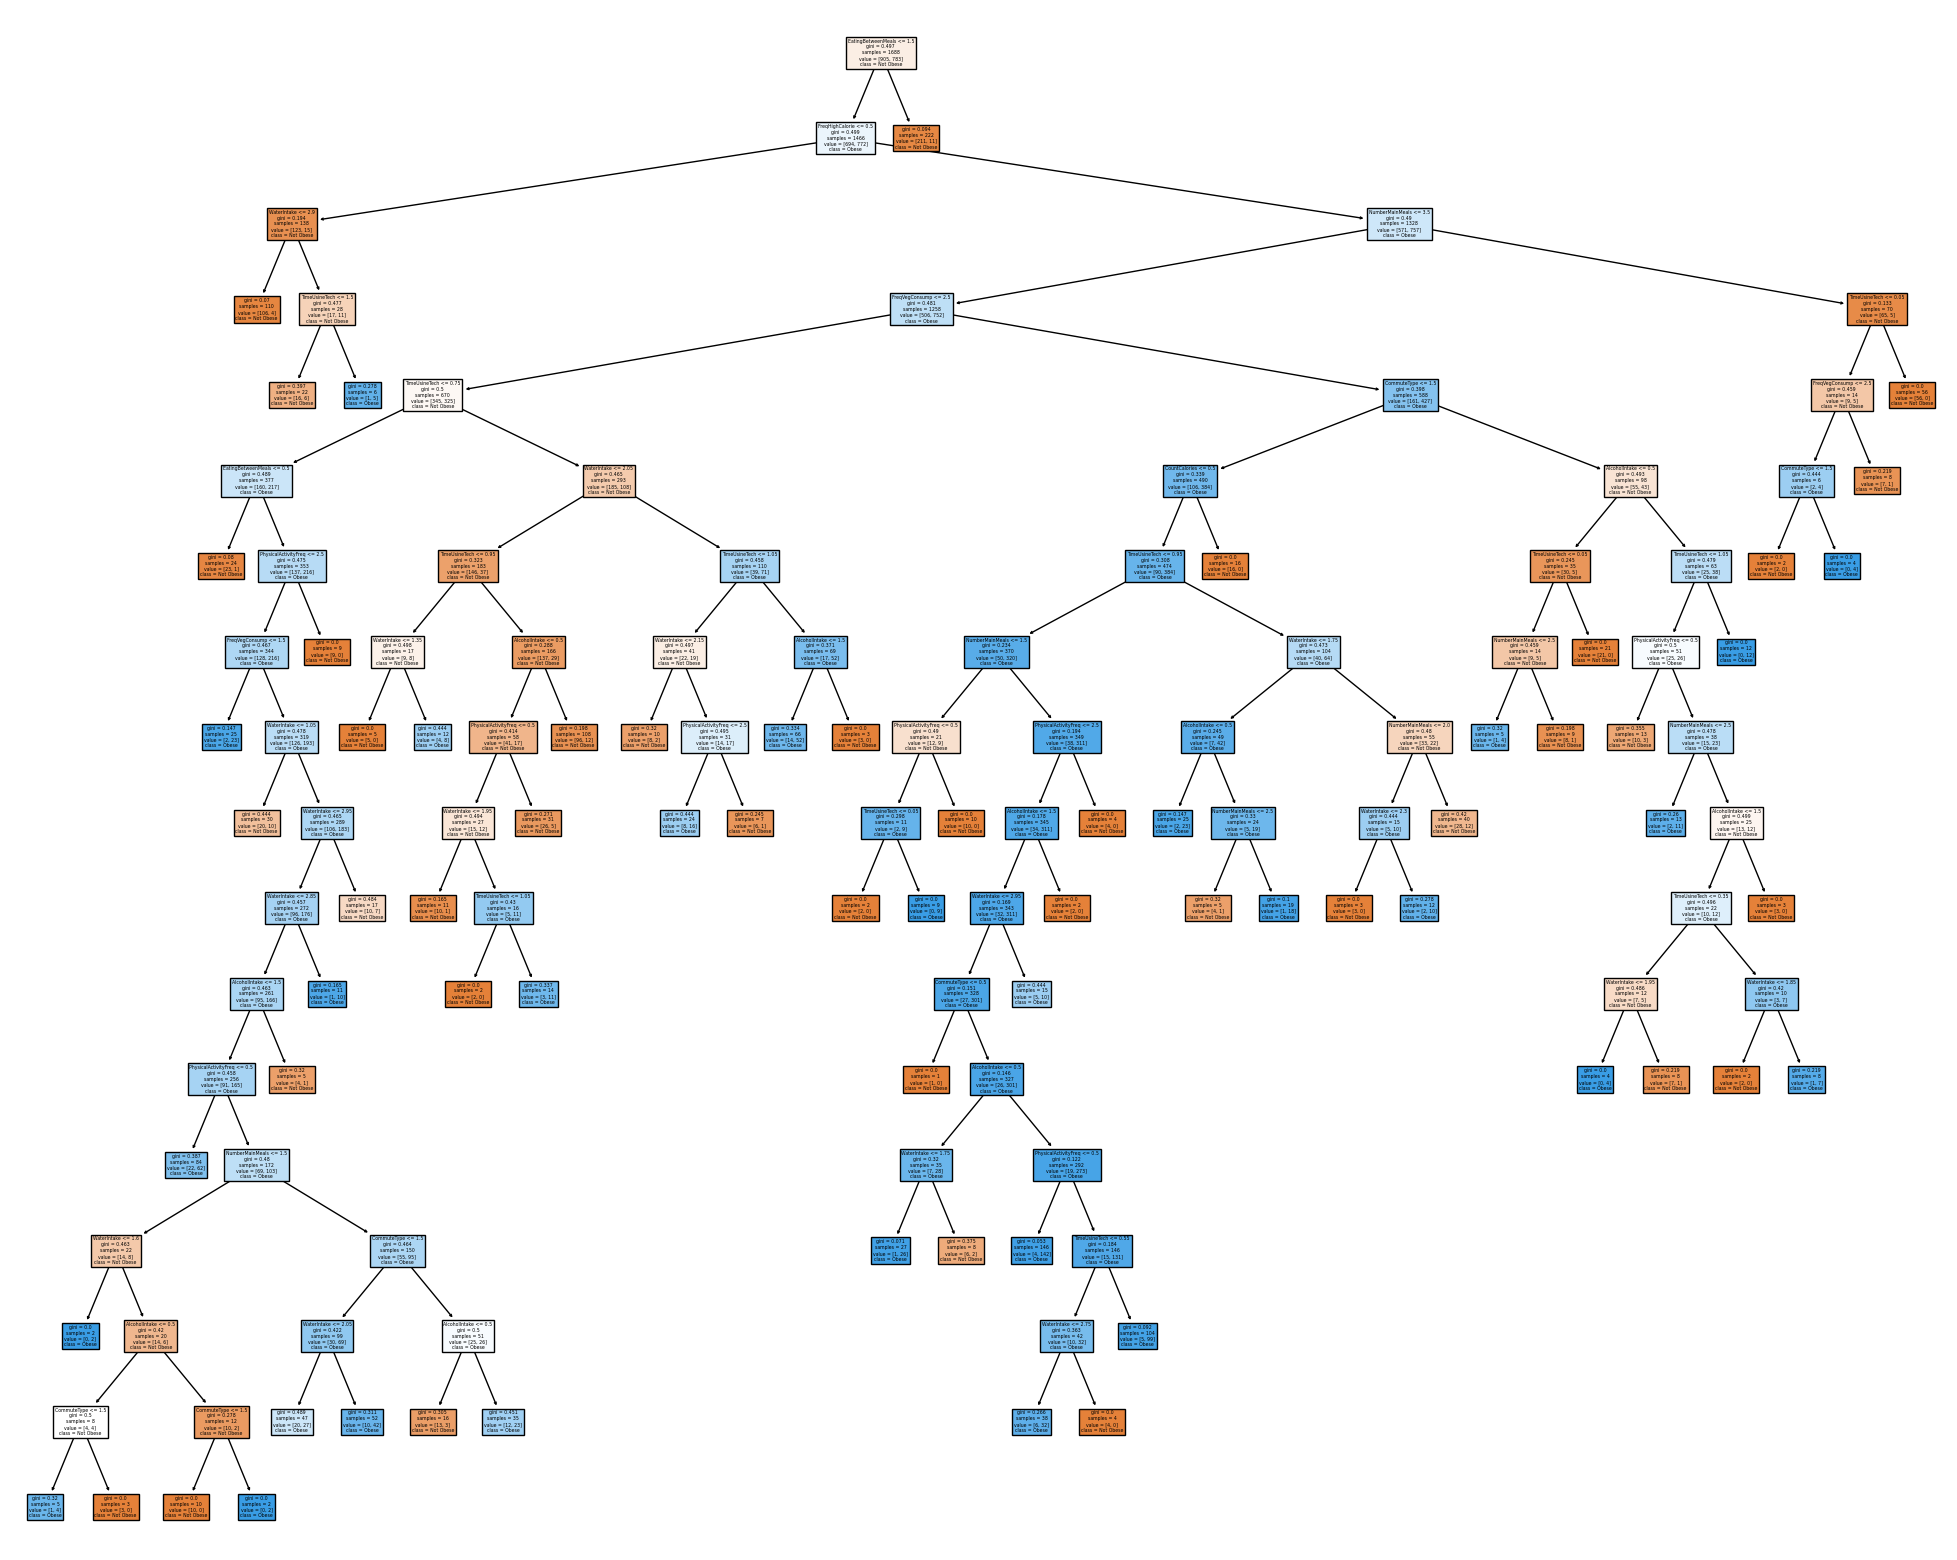

Feature Importances:
EatingBetweenMeals: 0.19917311298638513
WaterIntake: 0.17296042203200881
NumberMainMeals: 0.11811277509501066
FreqHighCalorie: 0.10352861292416118
TimeUsineTech: 0.10188648871230871
FreqVegConsump: 0.08370950513298148
CommuteType: 0.06202010597616788
PhysicalActivityFreq: 0.061048946160179286
AlcholIntake: 0.058033071710137926
CountCalories: 0.03952695927065891
Smoker: 0.0


In [15]:
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as skm


# df = pd.read_csv('BMI_MasterData.csv')
# classes = ['0','1','2','3','4','5','6']
df = pd.read_csv('BMI_ClassRedone.csv')
classes = ['Not Obese','Obese']

df['NumberMainMeals'] = df['NumberMainMeals'].round(decimals=0)
df['FreqVegConsump'] = df['FreqVegConsump'].round(decimals=0)
df['WaterIntake'] = df['WaterIntake'].round(decimals=1)
df['PhysicalActivityFreq'] = df['PhysicalActivityFreq'].round(decimals=0)
df['TimeUsineTech'] = df['TimeUsineTech'].round(decimals=1)
df['BMI'] = df['BMI'].round(decimals=1)

X = df.drop(columns=['Gender','Height', 'Weight', 'familyHistoryOverWeight', 'Age', 'Classification', 'BMI'])
y = df['Classification']

features = ['FreqHighCalorie','FreqVegConsump','NumberMainMeals','EatingBetweenMeals','Smoker','WaterIntake','CountCalories','PhysicalActivityFreq','TimeUsineTech','AlcoholIntake','CommuteType']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

classifier = tree.DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
classifier.fit(Xtrain, ytrain)

plt.figure(figsize=(25, 20))
plot_tree(classifier, 
          feature_names=features,  
          class_names=classes,
          filled=True)
plt.show()



# Get the path of alphas and impurities for cost-complexity pruning
path = classifier.cost_complexity_pruning_path(Xtrain, ytrain)
# print(path)

kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=10)
grid = skm.GridSearchCV(classifier,
                        {'ccp_alpha': path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
G = grid.fit(Xtrain, ytrain)

best_ = grid.best_estimator_
# print(np.mean((ytest - best_.predict(Xtest))**2))

# ax = plt.figure(figsize=(12, 12)).add_subplot(111)
# plot_tree(G.best_estimator_, feature_names=features, ax=ax)

# Visualize the pruned tree
plt.figure(figsize=(25, 20))
plot_tree(G.best_estimator_, 
          feature_names=features,  
          class_names=classes,
          filled=True)
plt.show()

best_pruned_tree = grid.best_estimator_
feature_importances = best_pruned_tree.feature_importances_

# Print or store sorted feature importances
print("Feature Importances:")
sorted_indices = np.argsort(feature_importances)[::-1]
for i in sorted_indices:
    print(f"{X.columns[i]}: {feature_importances[i]}")

# for feature, importance in zip(features, feature_importances):
#     print(f"{feature}: {importance}")


Accuracy Score for base tree with maxdepth = 3: 
0.7085308056872038
classes: 
[0 1]

Accuracy Score for base tree no max depth: 
0.8222748815165877
grid best score: 
0.7968124823894054
Accuracy score for pruned tree: 
0.8388625592417062
Truth        0    1
Predicted          
0          192   35
1           33  162
Mean Square Error is: 0.16113744075829384


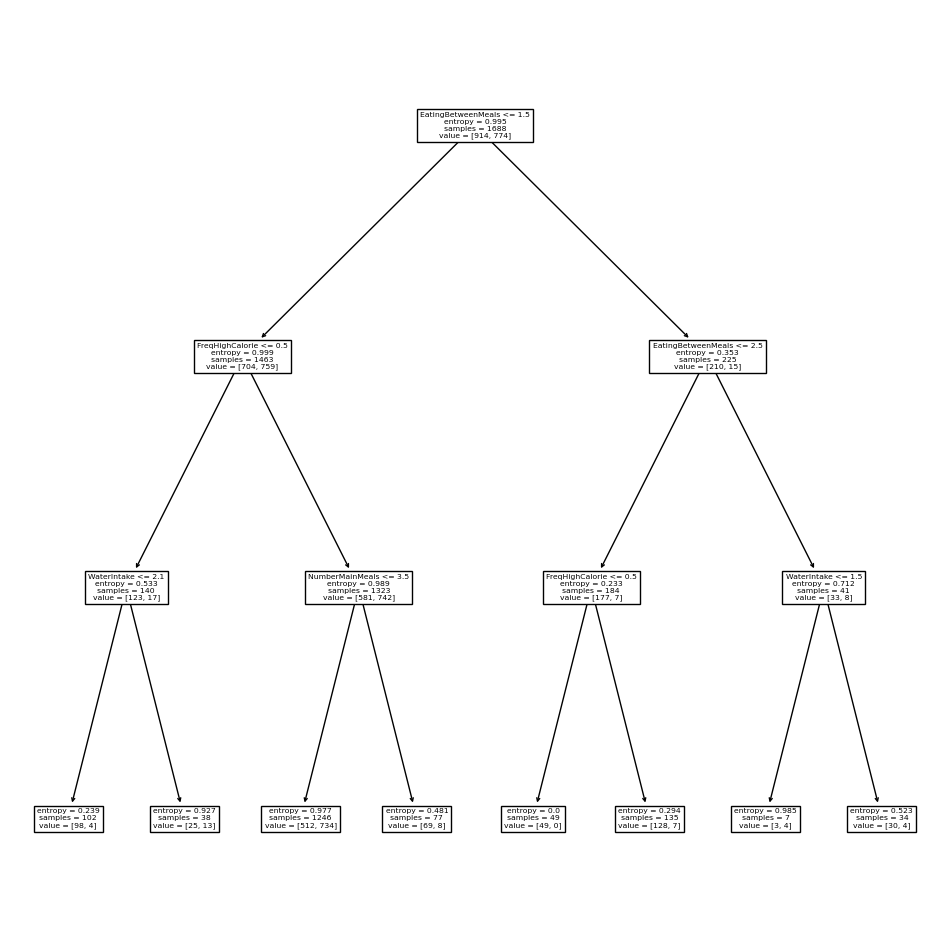

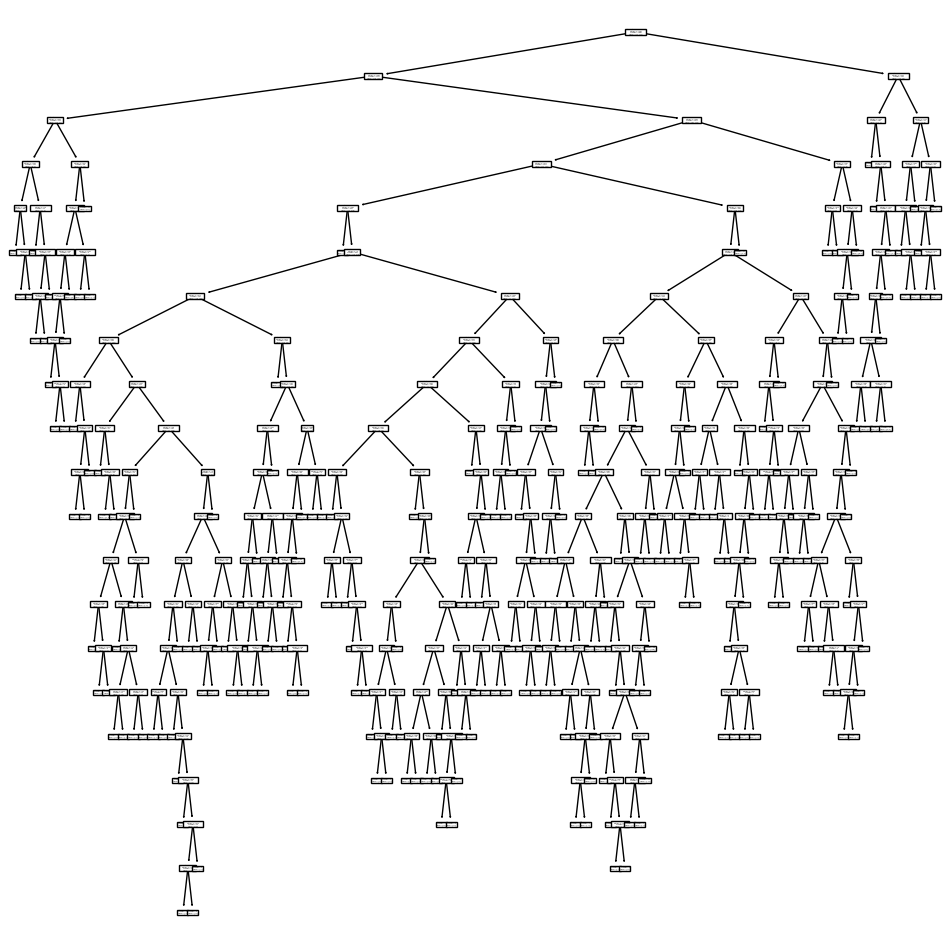

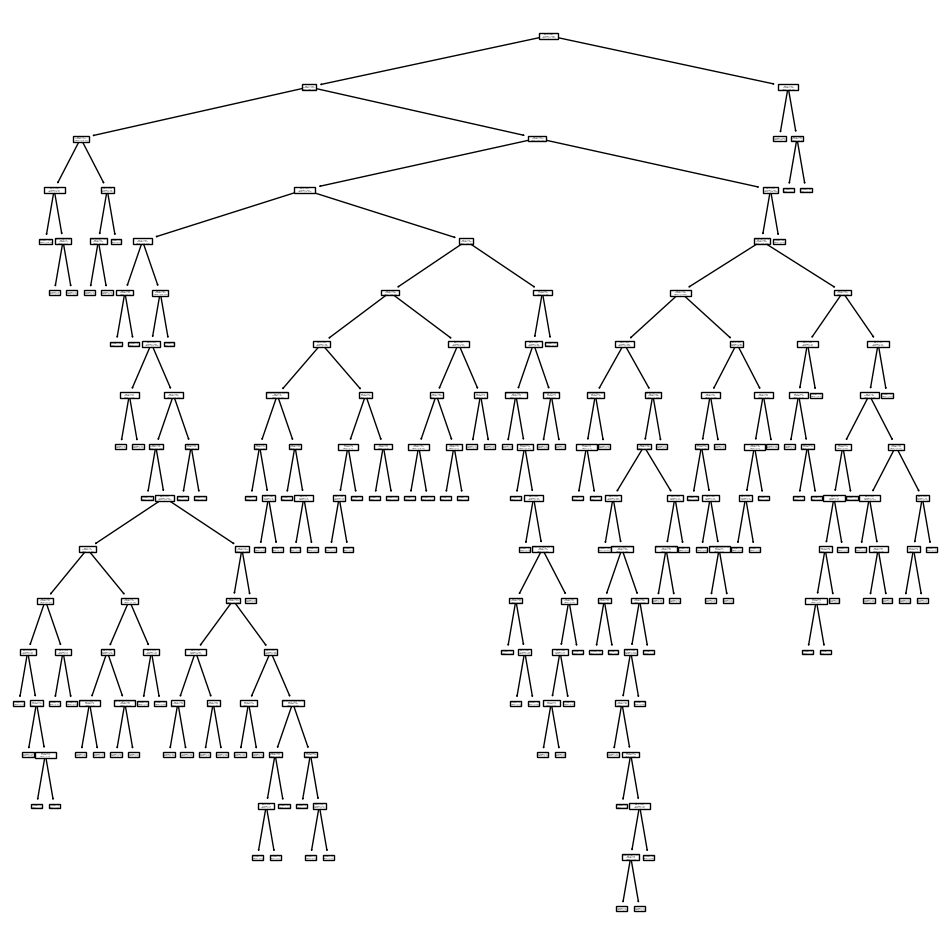

In [34]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART

df = pd.read_csv('BMI_ClassRedone.csv')
classes = ['Not Obese','Obese']

df['NumberMainMeals'] = df['NumberMainMeals'].round(decimals=0)
df['FreqVegConsump'] = df['FreqVegConsump'].round(decimals=0)
df['WaterIntake'] = df['WaterIntake'].round(decimals=1)
df['PhysicalActivityFreq'] = df['PhysicalActivityFreq'].round(decimals=0)
df['TimeUsineTech'] = df['TimeUsineTech'].round(decimals=1)
df['BMI'] = df['BMI'].round(decimals=1)

High = np.where(df.Classification == 1)

X = df.drop(columns=['Gender','Height', 'Weight', 'familyHistoryOverWeight', 'Age', 'Classification', 'BMI'])
y = df['Classification']

features = ['Gender','FreqHighCalorie','FreqVegConsump','NumberMainMeals','EatingBetweenMeals','Smoker','WaterIntake','CountCalories','PhysicalActivityFreq','TimeUsineTech','AlcoholIntake','CommuteType','BMI']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

model = MS(X, intercept=False)
D = model.fit_transform(df)
feature_names = list(D.columns)
X = np.asarray(D)

clf = DTC(criterion='entropy',
          max_depth=3,
          random_state=0)        
clf.fit(Xtrain, ytrain)

print("Accuracy Score for base tree with maxdepth = 3: ")
print(accuracy_score(ytest, clf.predict(Xtest)))

print("classes: ")
print(clf.classes_)

ax = subplots(figsize=(12,12))[1]
plot_tree(clf,
          feature_names=feature_names,
          ax=ax);


clf = DTC(criterion='entropy', random_state=0)
clf.fit(Xtrain, ytrain)

print()
print("Accuracy Score for base tree no max depth: ")
print(accuracy_score(ytest, clf.predict(Xtest)))

ccp_path = clf.cost_complexity_pruning_path(Xtrain, ytrain)
kfold = skm.KFold(10,
                  random_state=1,
                  shuffle=True)
      
grid = skm.GridSearchCV(clf,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(Xtrain, ytrain)
print("grid best score: ")
print(grid.best_score_)

ax = subplots(figsize=(12, 12))[1]
best_ = grid.best_estimator_
plot_tree(best_,
          feature_names=feature_names,
          ax=ax);

print("Accuracy score for pruned tree: ")
print(accuracy_score(ytest, best_.predict(Xtest)))
confusion = confusion_table(best_.predict(Xtest), ytest)
print(confusion)

best_ = grid.best_estimator_
MSE = np.mean((ytest - best_.predict(Xtest))**2)

print("Mean Square Error is: " + str(MSE))

ax = subplots(figsize=(12,12))[1]
plot_tree(G.best_estimator_,
          feature_names=features,
          ax=ax);

RandomForestRegressor(max_features=11, random_state=0)
RandomForestRegressor(max_features=11, random_state=0)
Mean Square Error bagging default is: 0.12273827117098678
Mean Square Error bagging with 500 n_estimators is: 0.12273827117098678
Mean Square Error for RF default is: 0.12273827117098678
There is no difference in MSE of Random Forest vs Bagging. They are both slightly better than a normal decision tree

Mean Square Error for boost is: 0.12273827117098678
This value is parctically the exact same as the value for both RF and bagging


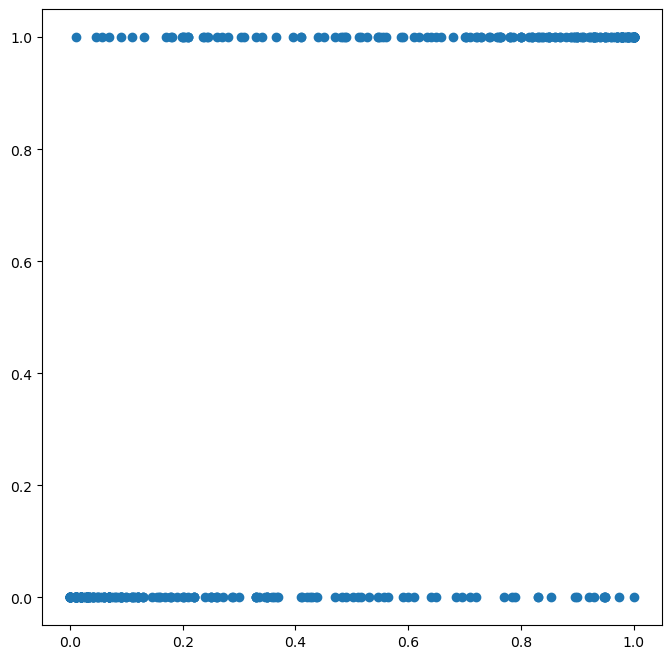

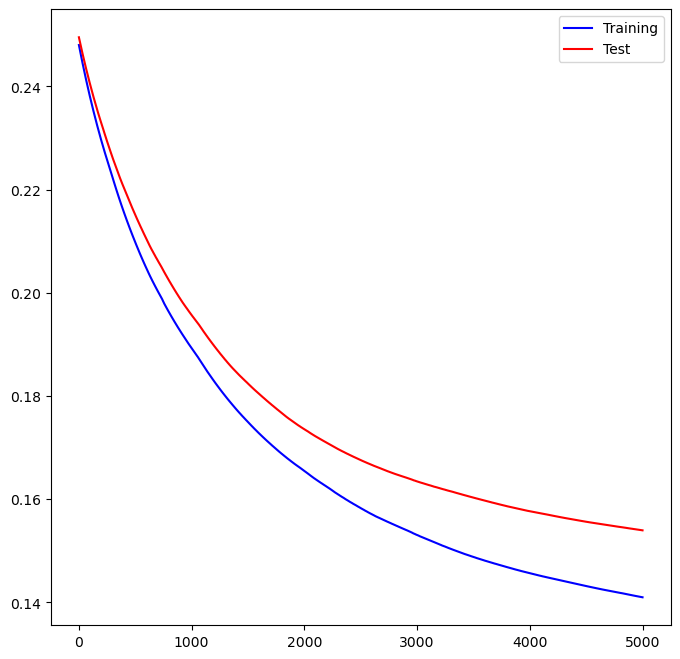

In [48]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART

df = pd.read_csv('BMI_ClassRedone.csv')
classes = ['Not Obese','Obese']

df['NumberMainMeals'] = df['NumberMainMeals'].round(decimals=0)
df['FreqVegConsump'] = df['FreqVegConsump'].round(decimals=0)
df['WaterIntake'] = df['WaterIntake'].round(decimals=1)
df['PhysicalActivityFreq'] = df['PhysicalActivityFreq'].round(decimals=0)
df['TimeUsineTech'] = df['TimeUsineTech'].round(decimals=1)
df['BMI'] = df['BMI'].round(decimals=1)


X = df.drop(columns=['Gender','Height', 'Weight', 'familyHistoryOverWeight', 'Age', 'Classification', 'BMI'])
y = df['Classification']

features = ['FreqHighCalorie','FreqVegConsump','NumberMainMeals','EatingBetweenMeals','Smoker','WaterIntake','CountCalories','PhysicalActivityFreq','TimeUsineTech','AlcoholIntake','CommuteType']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

bag_obese = RF(max_features=Xtrain.shape[1], random_state=0)
print(bag_obese)
print(bag_obese.fit(Xtrain, ytrain))

ax = subplots(figsize=(8,8))[1]
y_hat_bag = bag_obese.predict(Xtest)
ax.scatter(y_hat_bag, ytest)
MSE = np.mean((ytest - y_hat_bag)**2)
print("Mean Square Error bagging default is: " + str(MSE))


bag_boston = RF(max_features=Xtrain.shape[1],
                n_estimators=500,
                random_state=0).fit(Xtrain, ytrain)
y_hat_bag = bag_obese.predict(Xtest)
MSE = np.mean((ytest - y_hat_bag)**2)
print("Mean Square Error bagging with 500 n_estimators is: " + str(MSE))


RF_obese = RF(max_features=6,
               random_state=0).fit(Xtrain, ytrain)
y_hat_RF = RF_obese.predict(Xtest)
MSE = np.mean((ytest - y_hat_bag)**2)
print("Mean Square Error for RF default is: " + str(MSE))

feature_imp = pd.DataFrame(
    {'importance':RF_obese.feature_importances_},
    index=features)
feature_imp.sort_values(by='importance', ascending=False)

print("There is no difference in MSE of Random Forest vs Bagging. They are both slightly better than a normal decision tree")
print()

boost_obese = GBR(n_estimators=5000,
                   learning_rate=0.001,
                   max_depth=3,
                   random_state=0)
boost_obese.fit(Xtrain, ytrain)

test_error = np.zeros_like(boost_obese.train_score_)
for idx, y_ in enumerate(boost_obese.staged_predict(Xtest)):
   test_error[idx] = np.mean((ytest - y_)**2)

plot_idx = np.arange(boost_obese.train_score_.shape[0])
ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx,
        boost_obese.train_score_,
        'b',
        label='Training')
ax.plot(plot_idx,
        test_error,
        'r',
        label='Test')
ax.legend()

y_hat_boost = boost_obese.predict(Xtest);
MSE = np.mean((ytest - y_hat_bag)**2)
print("Mean Square Error for boost is: " + str(MSE))
print("This value is parctically the exact same as the value for both RF and bagging")

New features: ['FreqVegConsump' 'NumberMainMeals' 'WaterIntake' 'PhysicalActivityFreq'
 'TimeUsineTech']
Confusion matrix for Decision Tree
[[188  28]
 [ 53 153]]
Cross-validated Accuracy for Decision Tree: 0.782580373290257


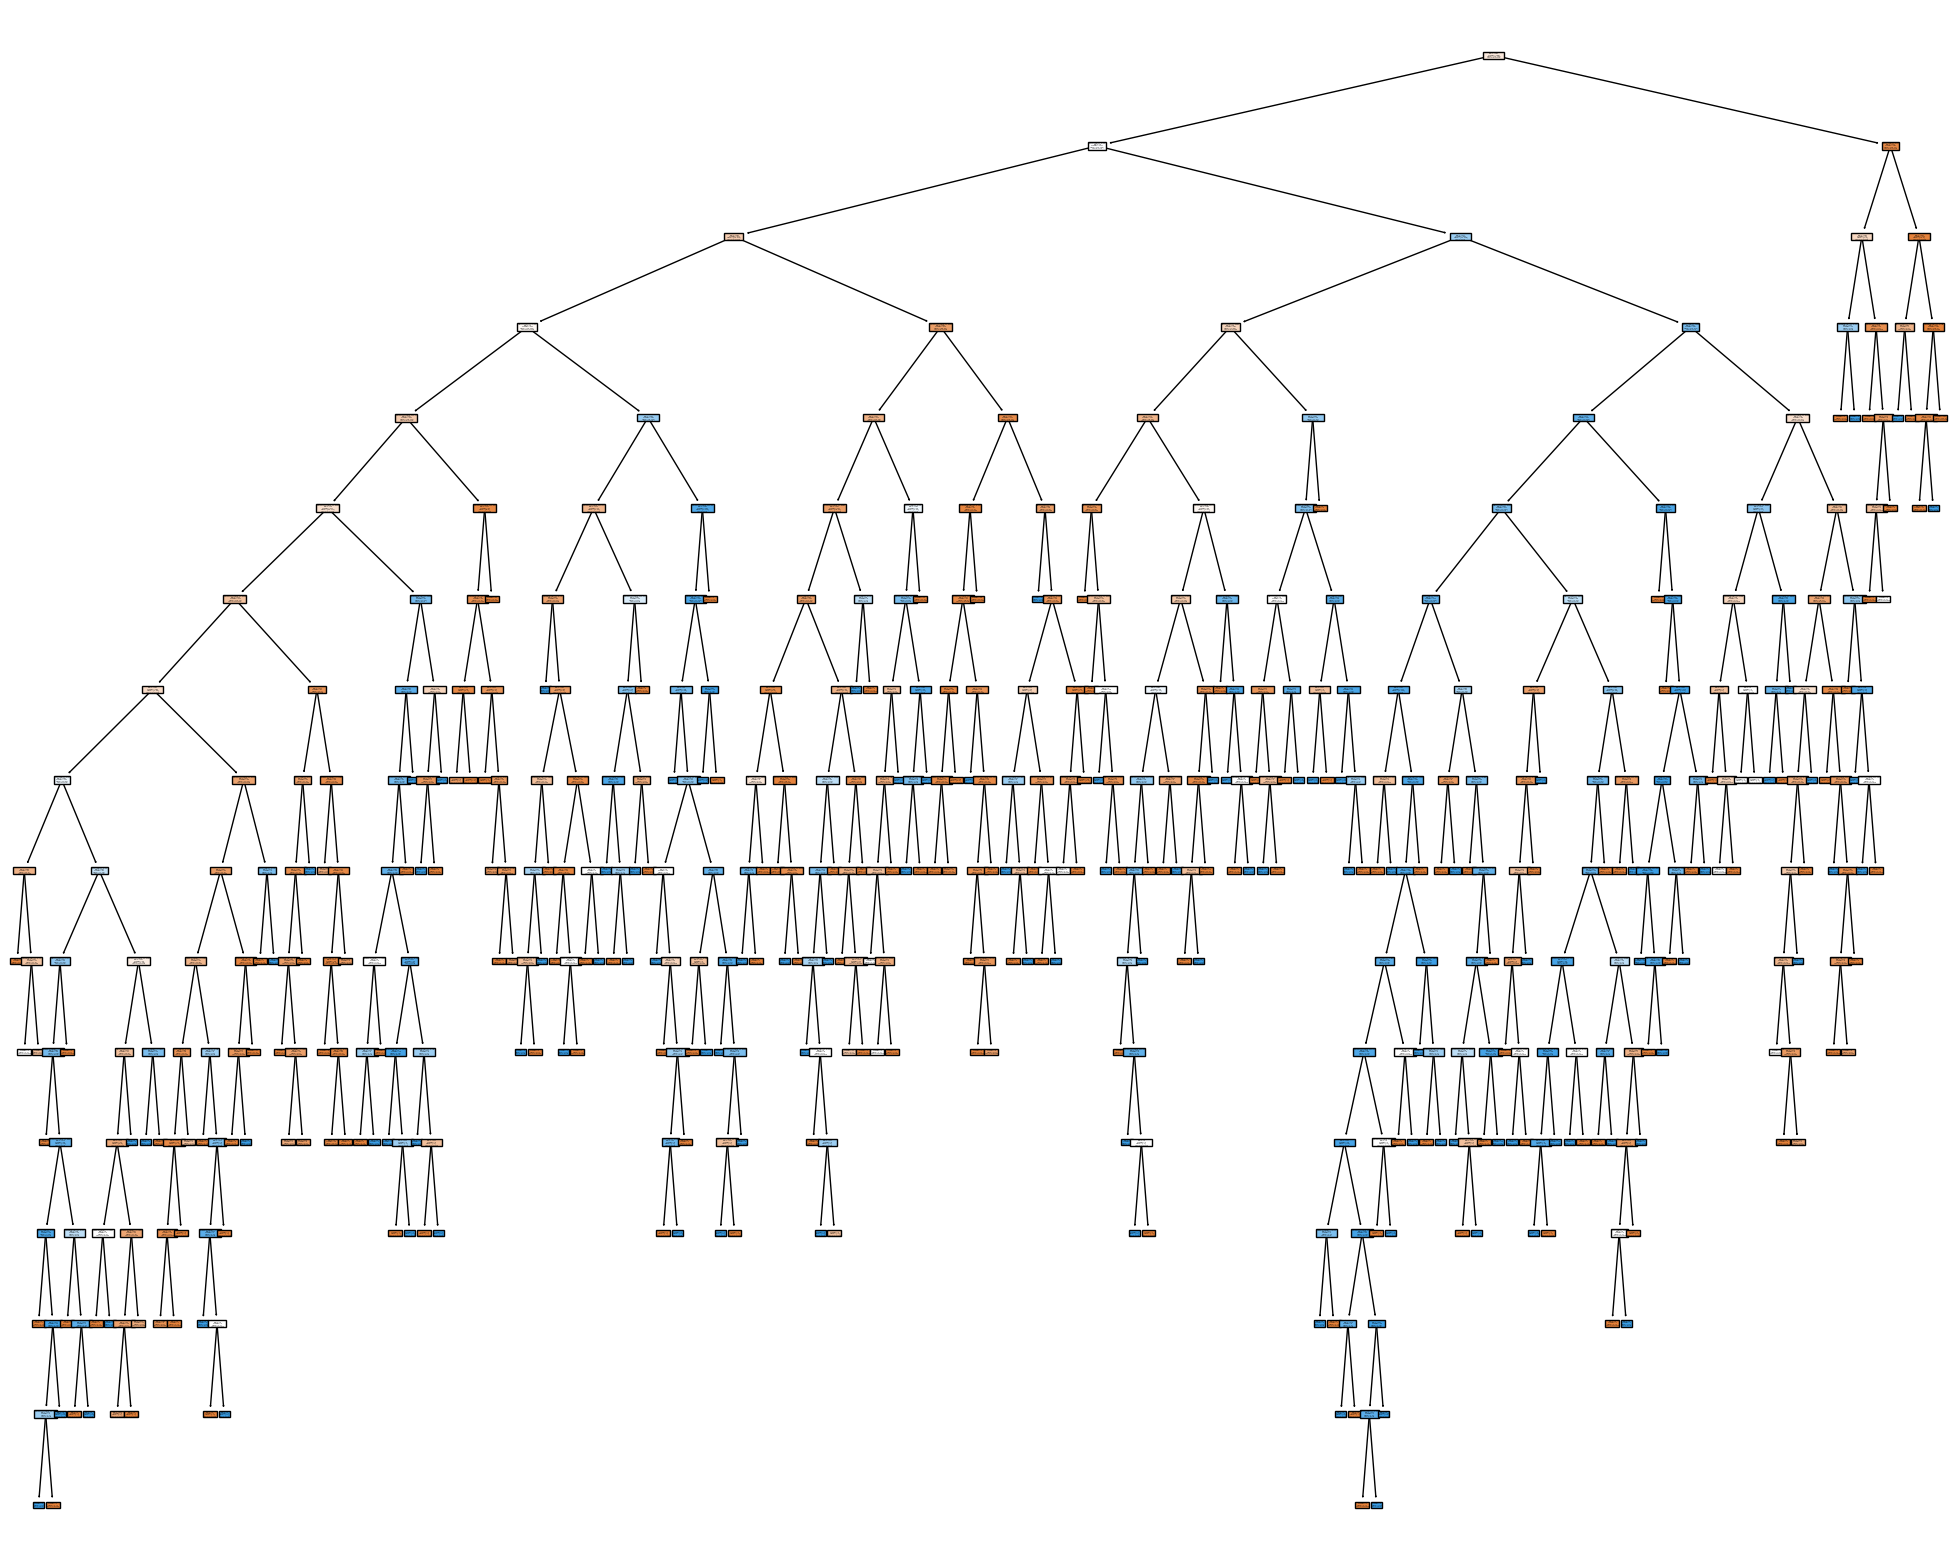

In [15]:
import pandas as pd
import numpy as np
import warnings
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import datetime as dt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning

df = pd.read_csv('BMI_ClassRedone.csv')

X = df.drop(columns=['Gender','Height', 'Weight', 'familyHistoryOverWeight', 'Age', 'Classification', 'BMI'])
y = df['Classification']
features = ['FreqHighCalorie','FreqVegConsump','NumberMainMeals','EatingBetweenMeals','Smoker','WaterIntake','CountCalories','PhysicalActivityFreq','TimeUsineTech','AlcoholIntake','CommuteType']
eVSp = ['NonObese','Obese']
x=0
lst = [0] * 101

while x < 1:
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)
    
    rfe = RFE(estimator=tree.DecisionTreeClassifier(), n_features_to_select=5)
    rfe.fit(Xtrain, ytrain)

    Xtrain_selected = rfe.transform(Xtrain)
    Xtest_selected = rfe.transform(Xtest)
    
    features = np.array(features)
    new_features = features[rfe.support_]
    print("New features: " + str(new_features))
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    warnings.filterwarnings("ignore")
    
#     Xtrain_selected = Xtrain
#     Xtest_selected = Xtest

    classifier = tree.DecisionTreeClassifier()
    classifier.fit(Xtrain_selected, ytrain)
    ypred_selected = classifier.predict(Xtest_selected)
    cmr3 = confusion_matrix(ytest,ypred_selected)
    print("Confusion matrix for Decision Tree")
    print(cmr3)
    cv_scores_dt = cross_val_score(classifier, Xtrain_selected, ytrain, cv=cv, scoring='accuracy')
    print("Cross-validated Accuracy for Decision Tree:", np.mean(cv_scores_dt))

    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(classifier, 
                       feature_names=new_features,  
                       class_names=eVSp,
                       filled=True)

    x = x + 1
#     print(x)

    
    



In [2]:
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error

df = pd.read_csv('BMI_ClassRedone.csv')

X = df.drop(columns=['Gender','Height', 'Weight', 'familyHistoryOverWeight', 'Age', 'Classification', 'BMI'])
y = df['BMI']
x=0
lst = [0] * 101
feature_importance_sum = np.zeros(X.shape[1])
mse = 0

while x < 20:
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

    warnings.filterwarnings("ignore")
    
    Xtrain_selected = Xtrain
    Xtest_selected = Xtest

    classifier2 = RandomForestRegressor()
    classifier2.fit(Xtrain_selected, ytrain)
    ypred_selected = classifier2.predict(Xtest_selected)
    
    feature_importance_sum += classifier2.feature_importances_
    
    mse = mse + mean_squared_error(ytest, ypred_selected)

    x = x + 1
#     print(x)

mse = mse / (x-1)
average_feature_importance = feature_importance_sum / 20

print("The Mean Squared Error for BMI Random Forest Regressor: " + str(mse))

print()

print("Feature Importances:")
sorted_indices = np.argsort(average_feature_importance)[::-1]
for i in sorted_indices:
    print(f"{X.columns[i]}: {average_feature_importance[i]}")
    
    



The Mean Squared Error for BMI Random Forest Regressor: 14.873544916210356

Feature Importances:
FreqVegConsump: 0.2009100923867717
TimeUsineTech: 0.18494363852080106
EatingBetweenMeals: 0.17474213842121772
PhysicalActivityFreq: 0.15741528569909538
NumberMainMeals: 0.09106197204299574
WaterIntake: 0.08677322451078077
CommuteType: 0.03985672938921431
AlcholIntake: 0.03604700174768734
CountCalories: 0.012290771648631973
FreqHighCalorie: 0.010963152053404004
Smoker: 0.004995993579400105
